In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\Dr.Asad\Desktop\PGA37\python\fifa_eda.csv")

In [3]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
df.shape

(18207, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.000000,200315.50,221759.000000,236529.500000,246620.00
Age,18207.0,25.122206,4.669943,16.000000,21.00,25.000000,28.000000,45.00
Overall,18207.0,66.238699,6.908930,46.000000,62.00,66.000000,71.000000,94.00
Potential,18207.0,71.307299,6.136496,48.000000,67.00,71.000000,75.000000,95.00
Value,17955.0,2444.530214,5626.715434,10.000000,325.00,700.000000,2100.000000,118500.00
Wage,18207.0,9.731312,21.999290,0.000000,1.00,3.000000,9.000000,565.00
International Reputation,18159.0,1.113222,0.394031,1.000000,1.00,1.000000,1.000000,5.00
Skill Moves,18159.0,2.361308,0.756164,1.000000,2.00,2.000000,3.000000,5.00
Joined,18207.0,2016.420607,2.018194,1991.000000,2016.00,2017.000000,2018.000000,2018.00
Height,18207.0,5.946771,0.220514,5.083333,5.75,5.916667,6.083333,6.75


In [7]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
Name,18207,17194,J. Rodríguez,11
Nationality,18207,164,England,1662
Club,17966,651,Liverpool,33
Preferred Foot,18207,2,Right,13996
Position,18207,27,ST,2154
Contract Valid Until,17918,35,2019-01-01,4870


In [8]:
missing_values=df.isnull().sum()

In [9]:
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Club                        241
Value                       252
International Reputation     48
Skill Moves                  48
Contract Valid Until        289
dtype: int64


<Figure size 1000x500 with 0 Axes>

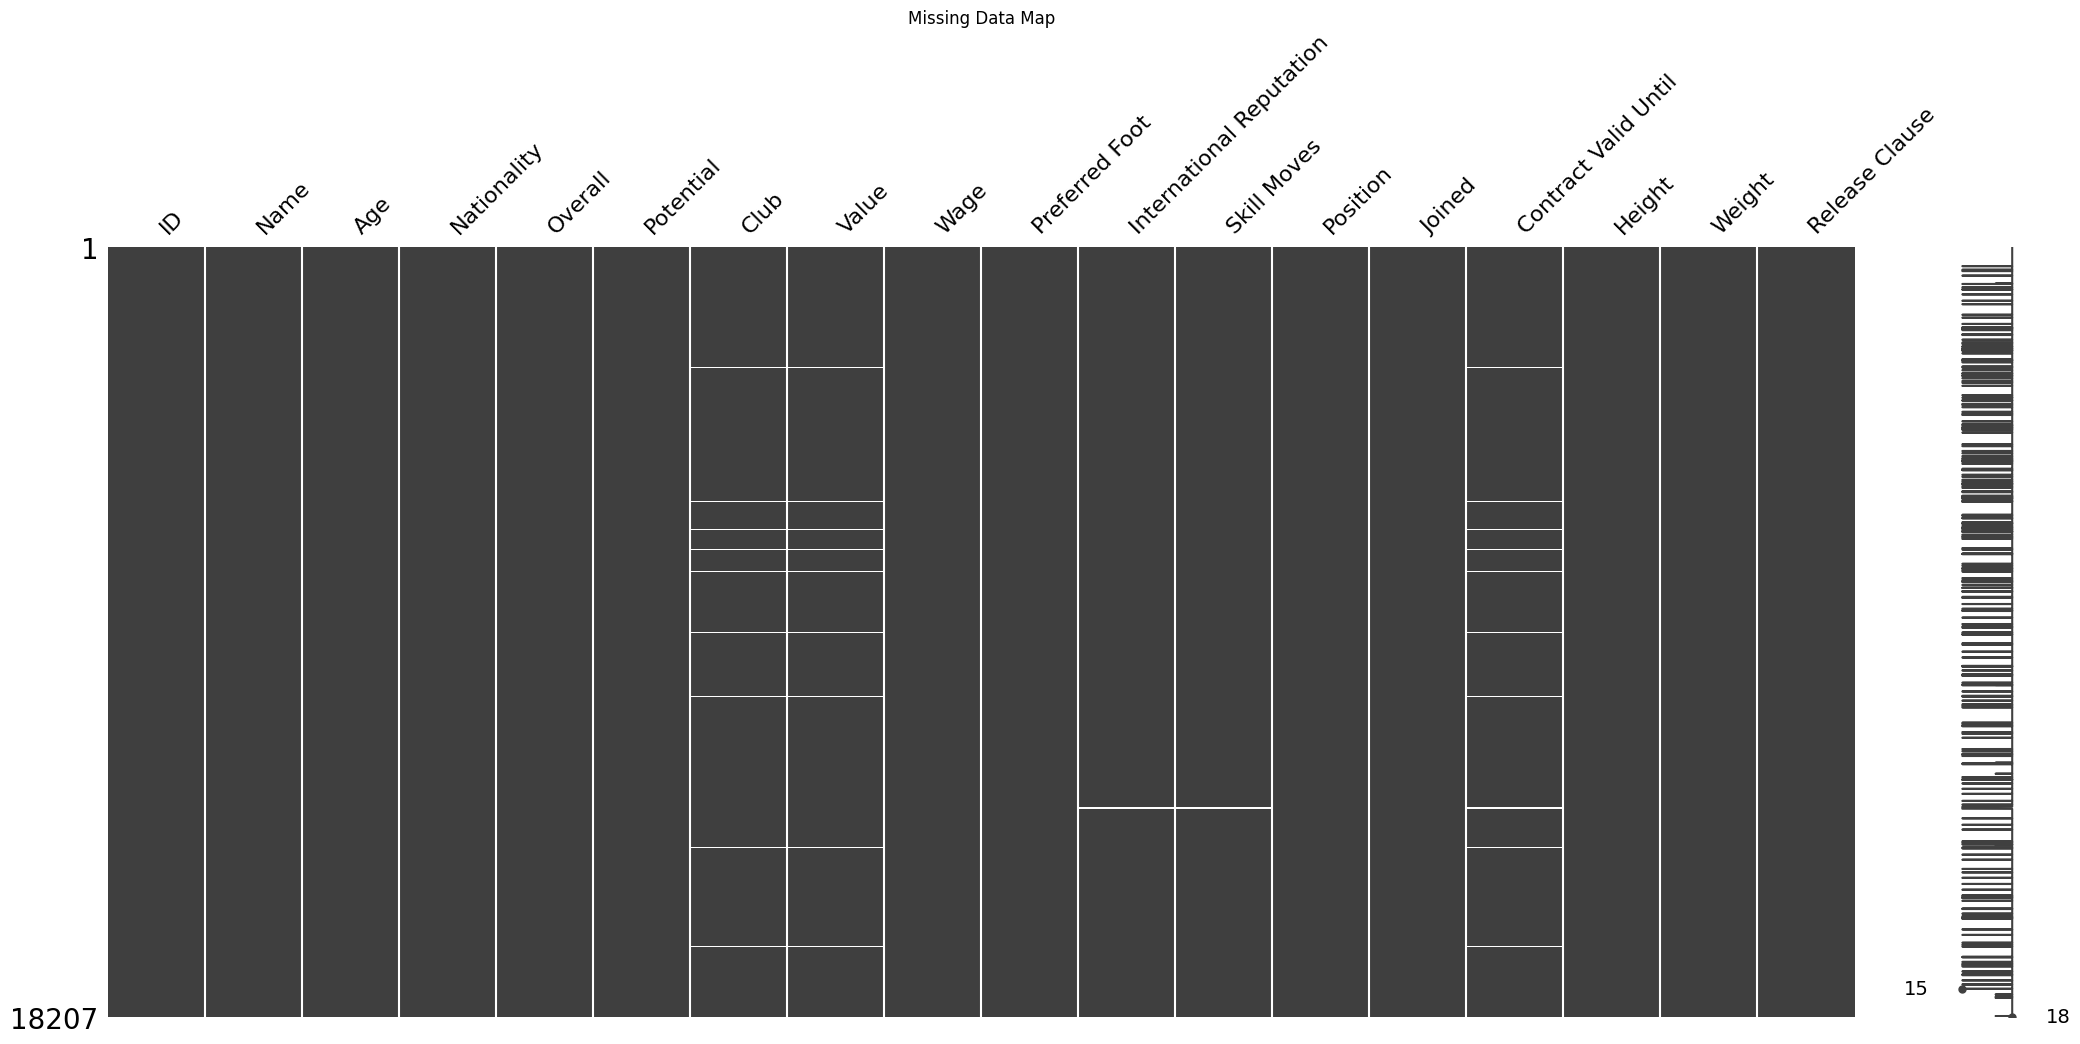

In [10]:
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Data Map")
plt.show()

In [14]:
df['Club'] = df['Club'].fillna('Unknown')
df['Value'] = df['Value'].fillna(df['Value'].median())
df['Release Clause'] = df['Release Clause'].fillna(df['Release Clause'].median())
df['Skill Moves'] = df['Skill Moves'].fillna(df['Skill Moves'].median())

In [15]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                   0
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

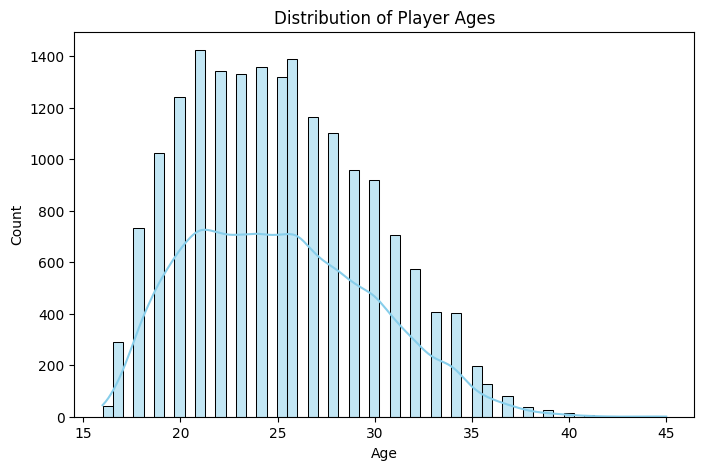

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Player Ages')
plt.show()

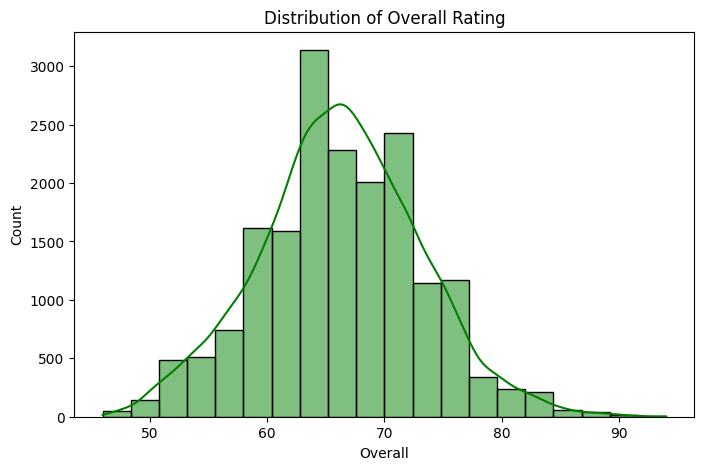

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Overall'], bins=20, kde=True, color='green')
plt.title('Distribution of Overall Rating')
plt.show()

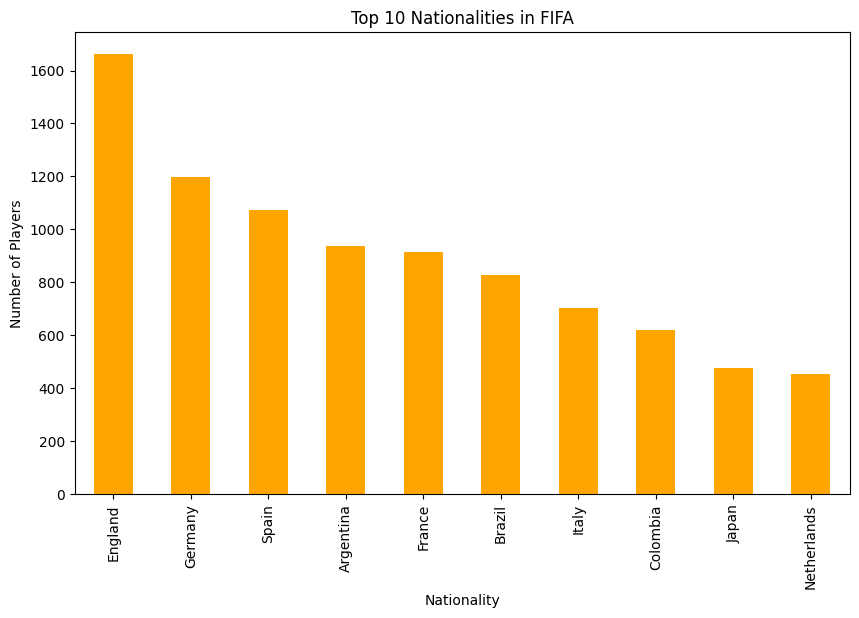

In [18]:
plt.figure(figsize=(10, 6))
df['Nationality'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Nationalities in FIFA')
plt.ylabel('Number of Players')
plt.show()

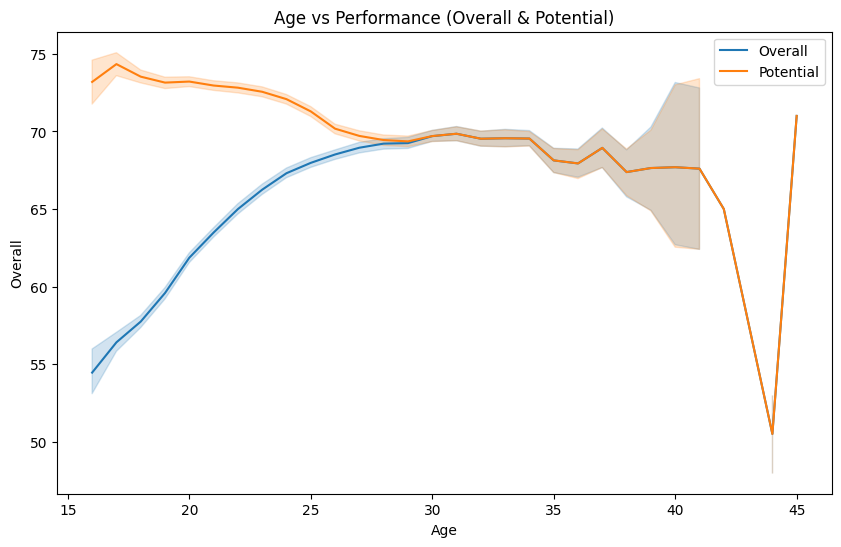

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Overall', data=df, label='Overall')
sns.lineplot(x='Age', y='Potential', data=df, label='Potential')
plt.title('Age vs Performance (Overall & Potential)')
plt.legend()
plt.show()

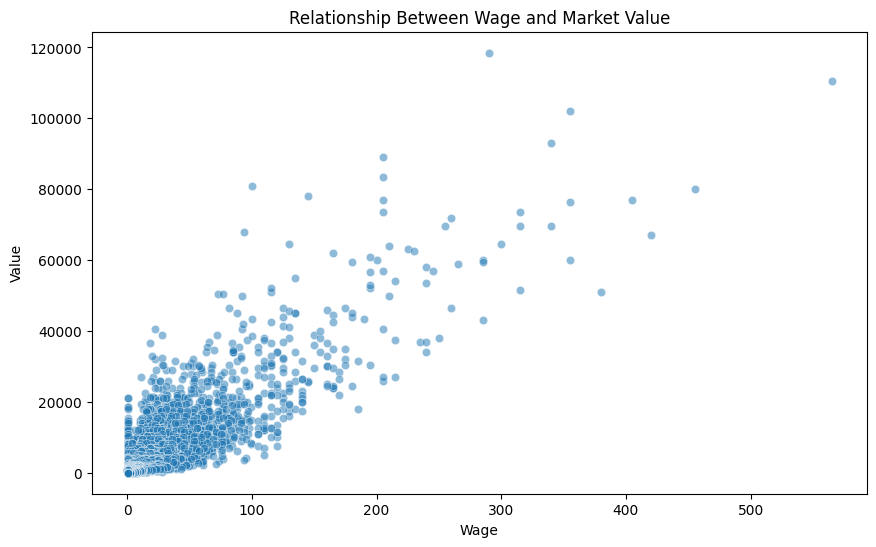

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wage', y='Value', data=df, alpha=0.5)
plt.title('Relationship Between Wage and Market Value')
plt.show()

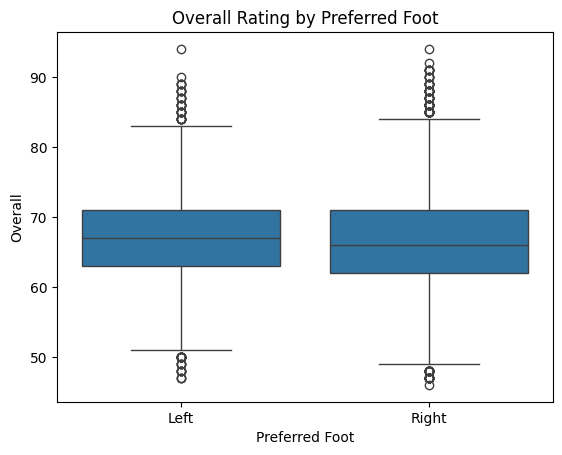

In [21]:
sns.boxplot(x='Preferred Foot', y='Overall', data=df)
plt.title('Overall Rating by Preferred Foot')
plt.show()

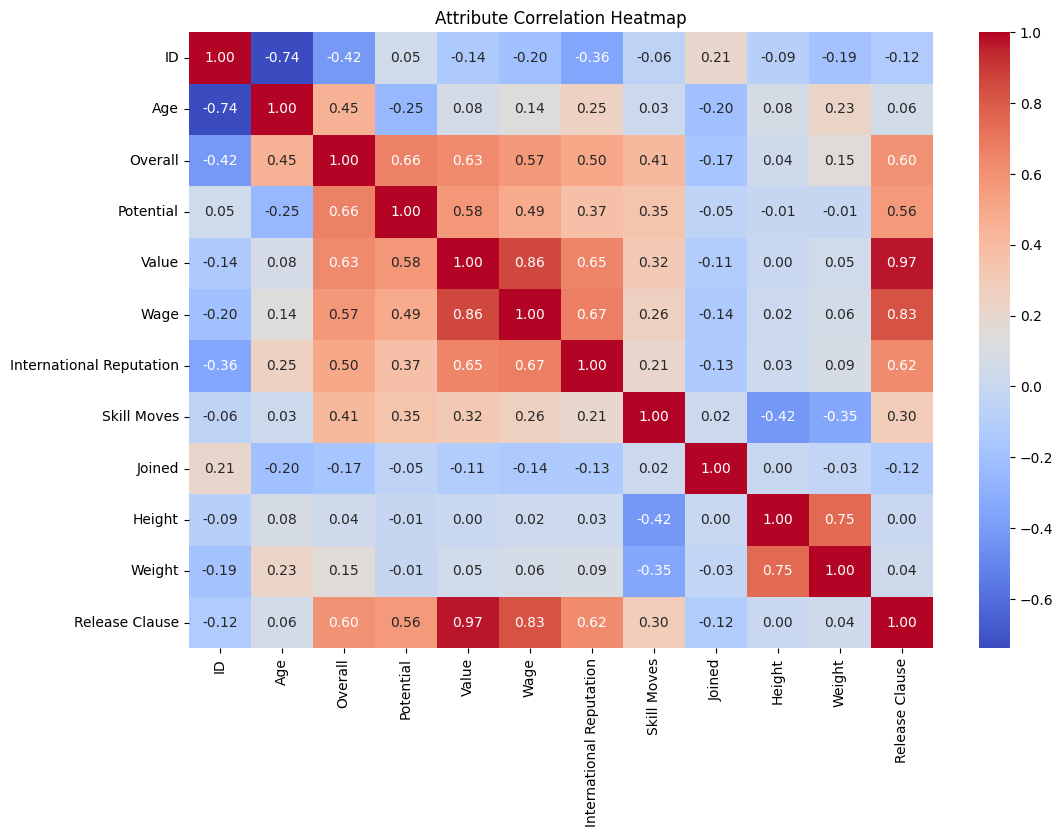

In [22]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Attribute Correlation Heatmap")
plt.show()

In [23]:
top_clubs = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
print("Top 10 Clubs by Average Rating:\n", top_clubs)

Top 10 Clubs by Average Rating:
 Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
SL Benfica             77.000000
Name: Overall, dtype: float64


In [24]:
df['Potential Growth'] = df['Potential'] - df['Overall']
young_prospects = df[df['Age'] <= 21].sort_values(by='Potential Growth', ascending=False)
print("Top Young Prospects for Growth:\n", young_prospects[['Name', 'Age', 'Overall', 'Potential Growth']].head())

Top Young Prospects for Growth:
                Name  Age  Overall  Potential Growth
18072   D. Campbell   17       50                26
16028   J. von Moos   17       58                26
17784  K. Askildsen   17       52                25
17175      B. Mumba   16       55                25
16629      Y. Lenze   17       57                25


In [25]:
best_by_pos = df.loc[df.groupby('Position')['Overall'].idxmax()][['Position', 'Name', 'Overall', 'Club']]
print("Best Players by Position:\n", best_by_pos)

Best Players by Position:
     Position               Name  Overall                      Club
17       CAM       A. Griezmann       89           Atlético Madrid
12        CB           D. Godín       90           Atlético Madrid
20       CDM    Sergio Busquets       89              FC Barcelona
271       CF       Luis Alberto       82                     Lazio
67        CM             Thiago       86         FC Bayern München
3         GK             De Gea       91         Manchester United
28       LAM       J. Rodríguez       88         FC Bayern München
35        LB            Marcelo       88               Real Madrid
24       LCB       G. Chiellini       89                  Juventus
11       LCM           T. Kroos       90               Real Madrid
14       LDM           N. Kanté       89                   Chelsea
5         LF          E. Hazard       91                   Chelsea
33        LM      P. Aubameyang       88                   Arsenal
21        LS          E. Cavani    

# Conclusion and Findings

Performance: Most players are aged between 20-28, with the Overall rating peaking around age 30.

Nationalities: England, Germany, and Spain are the most represented nations.

Financials: There is a strong positive correlation between Value and Wage, as expected, but high-potential young players often have high value despite lower current wages.

Potential: Young players (under 21) show the highest "Potential Growth" gap, making them valuable for long-term career modes.

Best player(overall): Cristiano Ronaldo (94 Rating overall)

Best Club by average Rating: Juventus